# Dummy variables

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

In [17]:
insurance_df = pd.read_csv('../Course Materials/Data/insurance.csv')

<Axes: xlabel='region'>

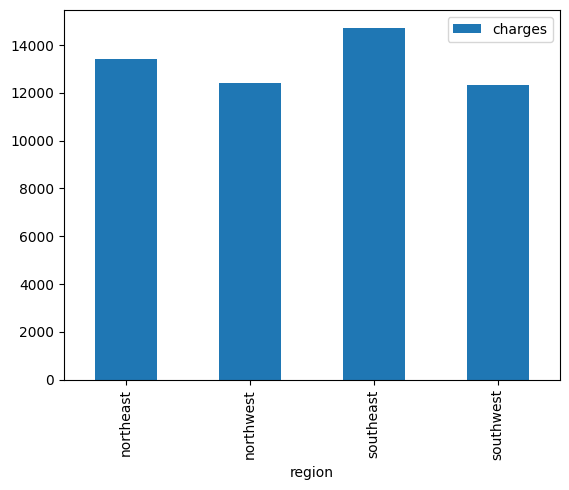

In [18]:
insurance_df.groupby('region').agg({'charges':'mean'}).plot.bar()

In [4]:
insurance_df=pd.get_dummies(insurance_df, drop_first=True)

insurance_df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


In [5]:
insurance_df =(
    pd.get_dummies(insurance_df, drop_first=True)
    .assign(age_sq = insurance_df['age']**2)
)

# Binning Categorical Data

Adding `dummy variables` for each categorical column in our data can lead to very wide data sets, which tends to increase model variance

**Grouping or binning** categorical data solves this issue and can improve interpretability

After **binning**, we create dummy variables for the groups which is fewer than before

In [12]:
def value_counter(df):
    value_series = pd.DataFrame()
    for col in df.select_dtypes(['bool']).columns:
        print(df[col].value_counts())

In [11]:
print(insurance_df.dtypes)


age                   int64
bmi                 float64
children              int64
charges             float64
sex_male               bool
smoker_yes             bool
region_northwest       bool
region_southeast       bool
region_southwest       bool
age_sq                int64
dtype: object


In [13]:
value_counter(insurance_df)

sex_male
True     676
False    662
Name: count, dtype: int64
smoker_yes
False    1064
True      274
Name: count, dtype: int64
region_northwest
False    1013
True      325
Name: count, dtype: int64
region_southeast
False    974
True     364
Name: count, dtype: int64
region_southwest
False    1013
True      325
Name: count, dtype: int64


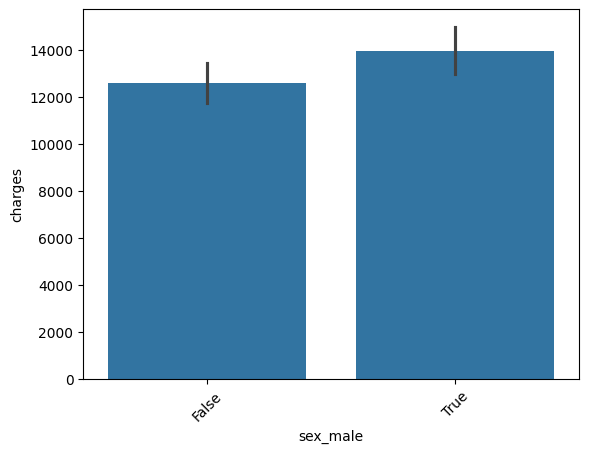

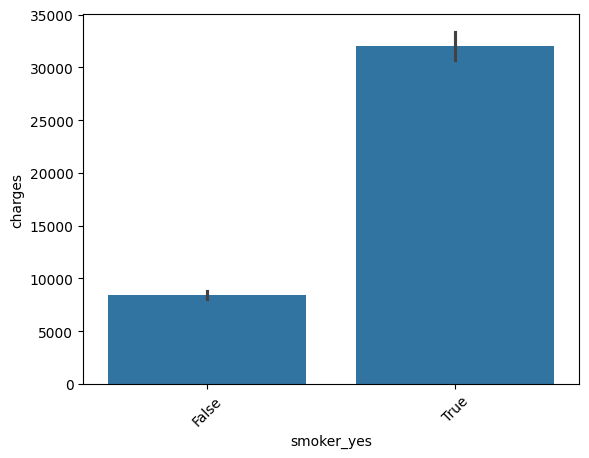

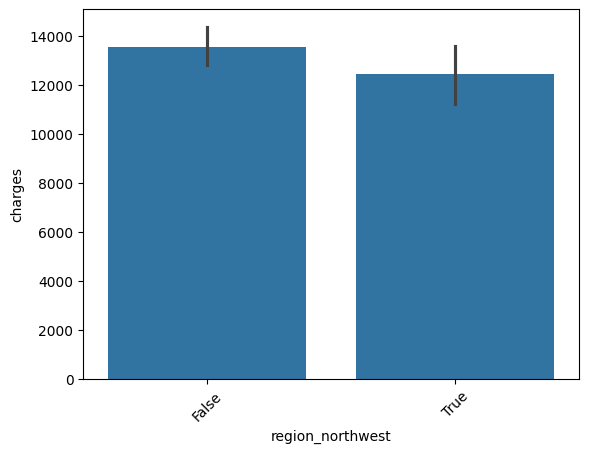

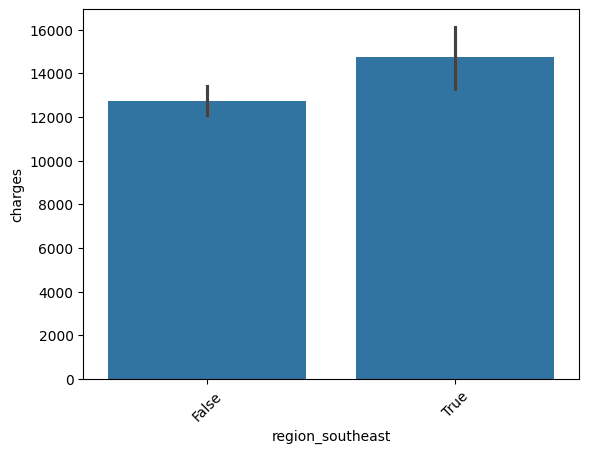

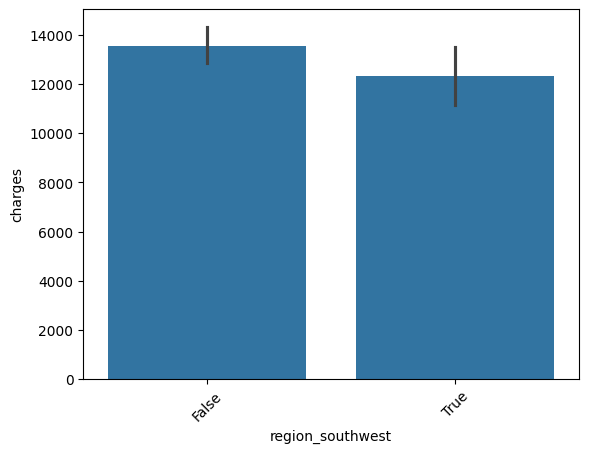

In [15]:
def cat_plotter(data, target):
    import matplotlib.pyplot as plt
    for col in data.select_dtypes(['bool']):
        sns.barplot(data = data, x = col, y = target)
        plt.xticks(rotation = 45)
        plt.show()

cat_plotter(insurance_df, 'charges')

In [19]:
# group regions into east and west
region_dict ={
    'northwest':'west',
    'southwest': 'west',
    'northeast': 'east',
    'southeast': 'east'
}

In [20]:
insurance_df['region_group'] = insurance_df['region'].map(region_dict)

In [21]:
insurance_df['region_group'].value_counts()

region_group
east    688
west    650
Name: count, dtype: int64

In [22]:
insurance_df = insurance_df.drop(['region', 'sex'], axis = 1)

In [23]:
from sklearn.model_selection import train_test_split

In [26]:
insurance_df = (
    pd.get_dummies(insurance_df, drop_first=True)
    .assign(
        age_sq = insurance_df['age']**2,
        smoker_bmi_int = lambda x: x['smoker_yes'] * x['bmi']
    )
)

X = sm.add_constant(insurance_df.drop(['charges'], axis=1))
y = insurance_df['charges']

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=22)
X.head()

,const,age,bmi,children,smoker_yes,region_group_west,age_sq,smoker_bmi_int
425,1.0,45,24.31,5,False,False,2025,0.0
851,1.0,61,32.30,2,False,True,3721,0.0
22,1.0,18,34.10,0,False,False,324,0.0
386,1.0,58,39.05,0,False,False,3364,0.0
560,1.0,46,19.95,2,False,True,2116,0.0


# Binning Numeric Data
This lets us turn numeric features into categories.

This is less accurate than using raw values, but highly interpretable way of capturing non-linear trends and numeric fields with a high percentage of missing values

In [30]:
diamonds = pd.read_csv('../Course Materials/Data/Diamonds Prices2022.csv')

In [31]:
diamonds = diamonds.assign(
    carat_bins = pd.cut(
        diamonds['carat'],
        bins =[0, .5, 1, 1.5, 2, 2.5, 3, 4, 6],
        labels=['0-.5', '.5-1', '1-1.5', '1.5-2', '2-2.5', '2.5-3', '3-4', '4+']
    )
)
diamonds[['carat', 'carat_bins']].head()

,carat,carat_bins
0,0.23,0-.5
1,0.21,0-.5
2,0.23,0-.5
3,0.29,0-.5
4,0.31,0-.5


In [ ]:
# now we can get dummy variables from this, we will have step function when we fit